# Bird Species Prediction

In this Project I am going to create a Convolutional Neural Network that will be able to predict the species of birds. I will be using differen layers and hyperparameter for building, training and testing the multiclasss classification model. I will be using keras for this project.

In [64]:
# Loading the dirve helper and mount
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [65]:
# opening folder where data is present
!ls "/content/drive/My Drive"


 20200709_214346.jpg	        IndiDrive
'6.2 Collab Code.zip'	       'IndiDrive (1)'
'Bird Speciees Dataset'        'IndiDrive (2)'
 Classroom		       'IndiDrive (3)'
'Colab Notebooks'	       'IndiDrive (4)'
 IMG_20211207_092111.jpg        lv_0_20230625194245.mp4
 IMG_20220108_111349.jpg       'New Document.pdf'
'IMG_20220116_141411 (1).jpg'   Sharer.pw
 IMG_20220116_141411.jpg       'Untitled 4_720p.mp4'


In [66]:
!ls "/content/drive/My Drive/Bird Speciees Dataset"

'AMERICAN GOLDFINCH'  'CARMINE BEE-EATER'  'EMPEROR PENGUIN'
'BARN OWL'	      'DOWNY WOODPECKER'    FLAMINGO


In [67]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.image import imread
import cv2
import random
from os import listdir
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing import image
from tensorflow.keras.utils import img_to_array, array_to_img
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from sklearn.model_selection import train_test_split

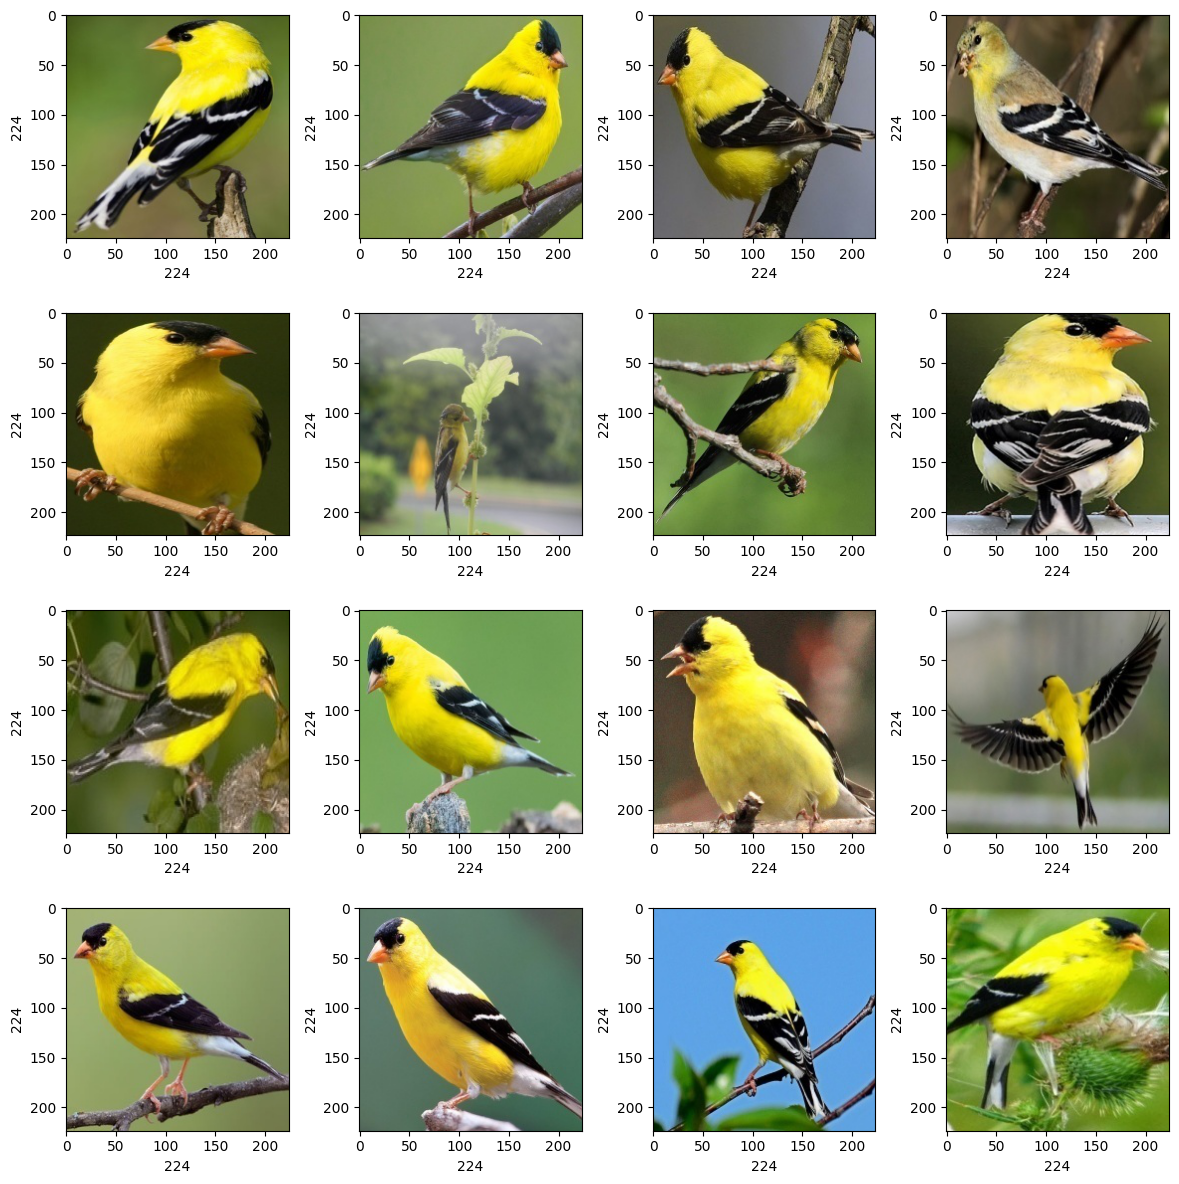

In [68]:
# plotting images to checkdataset
plt.figure(figsize=(12,12))
path = "/content/drive/My Drive/Bird Speciees Dataset/AMERICAN GOLDFINCH"
for i in range(1,17):
  plt.subplot(4,4,i)
  plt.tight_layout()
  rand_img = imread(path+'/'+ random.choice(sorted(listdir(path))))
  plt.imshow(rand_img)
  plt.xlabel(rand_img.shape[1], fontsize =10)
  plt.ylabel(rand_img.shape[0], fontsize =10)

In [69]:
# storing all folder in root directory
dir = "/content/drive/My Drive/Bird Speciees Dataset"
root_dir = listdir(dir)
image_list, label_list = [], []       # create empty dataset for image and labels.

In [70]:
# reading and converting image to numpy array
for directory in root_dir:
  for files in listdir(f"{dir}/{directory}"):
    image_path = f"{dir}/{directory}/{files}"
    image = cv2.imread(image_path)
    image = img_to_array(image)
    image_list.append(image)
    label_list.append(directory)

In [71]:
# visualize the number of classes count
label_counts = pd.DataFrame(label_list).value_counts()
label_counts

AMERICAN GOLDFINCH    143
EMPEROR PENGUIN       139
DOWNY WOODPECKER      137
FLAMINGO              132
CARMINE BEE-EATER     131
BARN OWL              129
dtype: int64

In [72]:
# checking for class imbalance
num_classes = len(label_counts)
num_classes

6

In [73]:
# checking image shape
image_list[0].shape

(224, 224, 3)

In [74]:
# checking  total number of image
label_list = np.array(label_list)
label_list.shape

(811,)

In [75]:
# creating training and testing data
x_train, x_test, y_train, y_test = train_test_split(image_list,label_list, test_size=0.2, random_state=42)


In [76]:
# normalizing image by dividing with 255
x_train = np.array(x_train, dtype=np.float16)/ 255.0
x_test = np.array(x_test, dtype=np.float16)/ 255.0
x_train = x_train.reshape(-1, 224,224,3)
x_test = x_test.reshape(-1, 224, 224,3)

In [77]:
# one hot encoding to our data to avoid priortization of classes
lb = LabelBinarizer()
y_train = lb.fit_transform(y_train)
y_test = lb.fit_transform(y_test)
print(lb.classes_)

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']


In [78]:
# splitting the training data into training and validation data set
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train,test_size=0.2)

In [79]:
# creating cnn model for classification of birds
model = Sequential()
model.add(Conv2D(8, (3,3), padding="same",  input_shape=(224,224,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(16, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(32,activation="relu"))
model.add(Dense(num_classes, activation="softmax"))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 224, 224, 8)       224       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 74, 74, 8)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 74, 74, 16)        1168      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 37, 37, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_12 (Conv2D)          (None, 37, 37, 32)        4640      
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 18, 18, 32)      

We created different layer in our cnn as:
* 1st convolution layer take array of image as input , afterward it is downsampled
* 2nd convolution layer takes downsampled featuremap

In [80]:
# compliling our model , with loss categorical_crossentropy for multiclass
model.compile(loss= 'categorical_crossentropy', optimizer = Adam(0.0005), metrics=['accuracy'])


In [81]:
# fitting the model
epochs = 50
batch_size = 128
history = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (x_val, y_val))

Epoch 1/50
5/5 [==============================] - 17s 3s/step - loss: 1.7620 - accuracy: 0.2355 - val_loss: 1.7468 - val_accuracy: 0.3000
Epoch 2/50
5/5 [==============================] - 15s 3s/step - loss: 1.6801 - accuracy: 0.2625 - val_loss: 1.6766 - val_accuracy: 0.3077
Epoch 3/50
5/5 [==============================] - 16s 3s/step - loss: 1.5324 - accuracy: 0.4305 - val_loss: 1.5224 - val_accuracy: 0.4154
Epoch 4/50
5/5 [==============================] - 16s 3s/step - loss: 1.3716 - accuracy: 0.5154 - val_loss: 1.4183 - val_accuracy: 0.4385
Epoch 5/50
5/5 [==============================] - 16s 3s/step - loss: 1.2258 - accuracy: 0.5386 - val_loss: 1.2933 - val_accuracy: 0.5000
Epoch 6/50
5/5 [==============================] - 16s 3s/step - loss: 1.0819 - accuracy: 0.6564 - val_loss: 1.1518 - val_accuracy: 0.5923
Epoch 7/50
5/5 [==============================] - 16s 3s/step - loss: 0.9761 - accuracy: 0.6602 - val_loss: 1.0297 - val_accuracy: 0.6385
Epoch 8/50
5/5 [==================

In [82]:
model.save("/content/drive/My Drive/bird_species.h5")

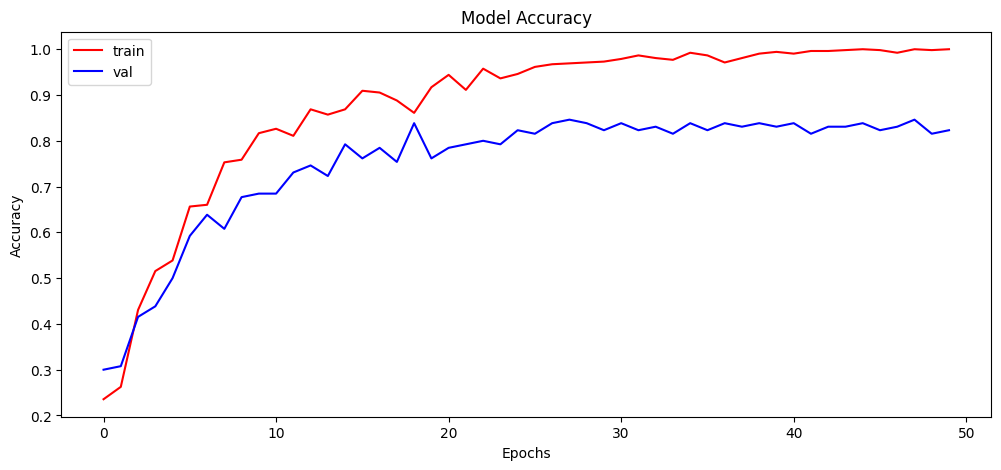

In [84]:
# Plotting the model performance
plt.figure(figsize=(12,5))
plt.plot(history.history['accuracy'],color='r')
plt.plot(history.history['val_accuracy'],color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

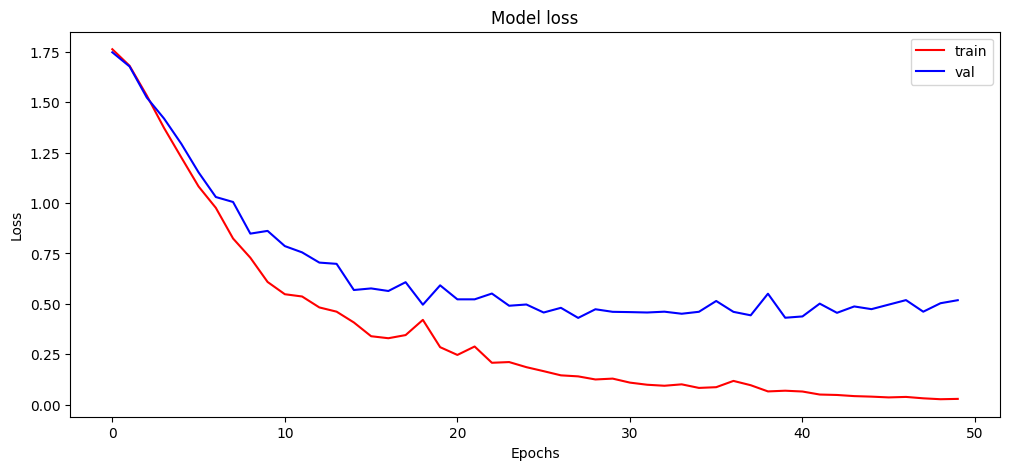

In [85]:
# plotting loss history
plt.figure(figsize=(12,5))
plt.plot(history.history['loss'],color='r')
plt.plot(history.history['val_loss'],color='b')
plt.title('Model loss')
plt.ylabel("Loss")
plt.xlabel('Epochs')
plt.legend(['train','val'])
plt.show()

In [86]:
# calculating test accuracy
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")

6/6 [==============================] - 3s 392ms/step - loss: 0.4374 - accuracy: 0.8896
Test Accuracy: 88.95705342292786


In [87]:
# storing predictions
y_pred = model.predict(x_test)


6/6 [==============================] - 3s 321ms/step


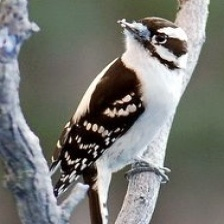

In [92]:
# plotting image to compare
img = array_to_img(x_test[8])
img

In [93]:
# finding max value from prediction list and comparing original value vs predicted
labels = lb.classes_
print(labels)
print('Originally : ',labels[np.argmax([y_test[8]])])
print('Predicted: ',labels[np.argmax([y_pred[8]])])

['AMERICAN GOLDFINCH' 'BARN OWL' 'CARMINE BEE-EATER' 'DOWNY WOODPECKER'
 'EMPEROR PENGUIN' 'FLAMINGO']
Originally :  DOWNY WOODPECKER
Predicted:  DOWNY WOODPECKER


# Conclusion :
I created a CNN model that classify birds into 6 classes and model got test accuracy of around 89%